### Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
# Path
path= r"C:\Users\nabar\OneDrive\Documents\A6 Project"
# Dataframe

df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'choropleth_ready_data.csv'))


In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [5]:
# Import ".json" file for the U.S. 
country_geo = r"C:\Users\nabar\Downloads\us-states.json"

In [6]:
country_geo

'C:\\Users\\nabar\\Downloads\\us-states.json'

In [7]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r"C:\Users\nabar\Downloads\us-states.json",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [8]:
df.head()

,State,Total Population,Ethnicity,Population,ASD Rate,Estimated ASD Cases
0,AK,41125,White,37508.0,0.846995,31769.071038
1,AK,42649,White,38893.0,0.846995,32942.158470
2,AK,43496,White,39670.0,0.846995,33600.273224
3,AK,44201,White,40265.0,0.846995,34104.234973
4,AK,45588,White,41435.0,0.846995,35095.218579


In [9]:
df.shape

(83580, 6)

### Cleaning Data

#### I addressed the dummy columns at the beginning of the project.

In [10]:
print(df.isnull().sum())

State                      0
Total Population           0
Ethnicity                  0
Population              7960
ASD Rate               11940
Estimated ASD Cases    19900
dtype: int64


In [11]:
#Fix Missing value
df["ASD Rate"] = df["ASD Rate"].fillna(df["ASD Rate"].median())

In [12]:
# Fix Estimated Asd Cases Missing Values
df["Estimated ASD Cases"] = df["Population"] * df["ASD Rate"]

In [13]:
# Keep only compleat values
df.dropna(subset=["Population", "ASD Rate", "Estimated ASD Cases"], inplace=True)

In [14]:
print(df.isnull().sum())

State                  0
Total Population       0
Ethnicity              0
Population             0
ASD Rate               0
Estimated ASD Cases    0
dtype: int64


In [15]:
print(df.duplicated().sum())

4


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
print(df.duplicated().sum())

0


In [18]:
print(df.dtypes)

State                   object
Total Population         int64
Ethnicity               object
Population             float64
ASD Rate               float64
Estimated ASD Cases    float64
dtype: object


In [19]:
# Dictionary mapping state abbreviations to full names
state_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming"
}

# Convert abbreviations to full names
df["State"] = df["State"].replace(state_mapping)

In [20]:
print(df["State"].unique())

['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'Florida' 'Georgia' 'Iowa' 'Nebraska' 'Idaho' 'Illinois'
 'Indiana' 'Kansas' 'Missouri' 'Kentucky' 'Louisiana' 'Massachusetts'
 'Maryland' 'Maine' 'Michigan' 'Minnesota' 'Mississippi' 'Montana'
 'North Carolina' 'North Dakota' 'New Hampshire' 'New Jersey' 'New Mexico'
 'Nevada' 'New York' 'Ohio' 'Oklahoma' 'Oregon' 'Washington'
 'Pennsylvania' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Virginia' 'Vermont' 'Wisconsin' 'West Virginia']


In [21]:
df.to_csv("cleaned_dataset_with_full_states.csv", index=False)

Index(['Total Population', 'Population', 'ASD Rate', 'Estimated ASD Cases'], dtype='object')


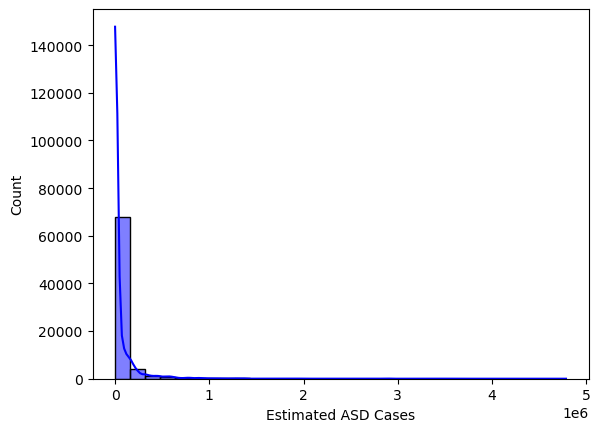

In [22]:
# Extreme value check
import matplotlib.pyplot as plt
column_to_check = "Estimated ASD Cases" 
print(df.select_dtypes(include=["number"]).columns)
sns.histplot(df[column_to_check], bins=30, kde=True, color="blue")
plt.show()


In [23]:
print(df["Estimated ASD Cases"].describe())

count    7.561600e+04
mean     6.452885e+04
std      2.290238e+05
min      0.000000e+00
25%      5.863636e+02
50%      2.650577e+03
75%      2.641895e+04
max      4.783624e+06
Name: Estimated ASD Cases, dtype: float64


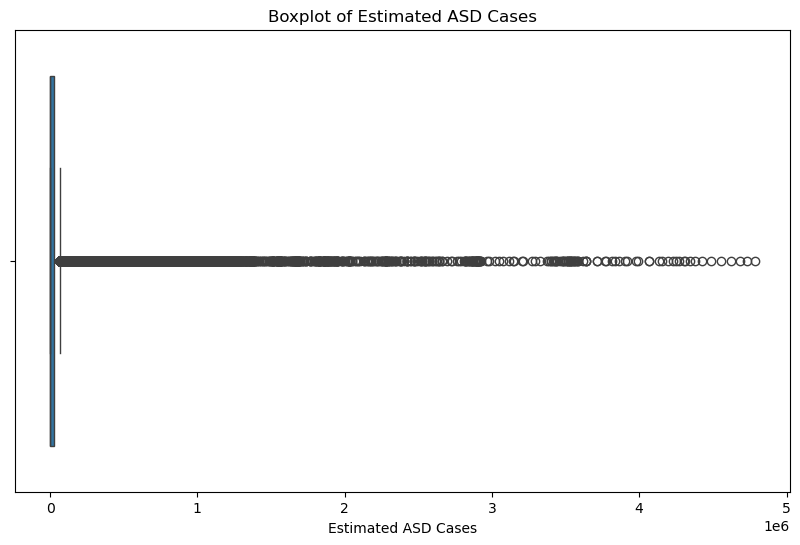

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Estimated ASD Cases"])
plt.title("Boxplot of Estimated ASD Cases")
plt.show()

In [25]:
df["Log_ASD_Cases"] = np.log1p(df["Estimated ASD Cases"])

In [26]:
cutoff_value = np.percentile(df["Estimated ASD Cases"], 95)
df_filtered = df[df["Estimated ASD Cases"] <= cutoff_value]

print(f"Cutoff value (95th percentile): {cutoff_value}")

Cutoff value (95th percentile): 304738.04644808744


In [27]:
print(df["Estimated ASD Cases"].isnull().sum())

0


In [28]:
df_filtered = df[df["Estimated ASD Cases"] <= cutoff_value]

In [29]:
print(df_filtered.describe())

       Total Population     Population      ASD Rate  Estimated ASD Cases  \
count      7.183500e+04   71835.000000  71835.000000         71835.000000   
mean       3.937636e+05   33507.597244      0.729861         26473.720228   
std        6.144618e+05   67381.632520      0.098980         54639.073911   
min        6.337000e+03       0.000000      0.566942             0.000000   
25%        1.176280e+05     774.000000      0.625000           536.890218   
50%        2.161580e+05    3303.000000      0.746712          2275.979417   
75%        4.074000e+05   21480.500000      0.757576         15143.105785   
max        7.765907e+06  523552.000000      0.875000        304685.109290   

       Log_ASD_Cases  
count   71835.000000  
mean        7.957174  
std         2.369786  
min         0.000000  
25%         6.287654  
50%         7.730605  
75%         9.625367  
max        12.627037  


Index(['Total Population', 'Population', 'ASD Rate', 'Estimated ASD Cases',
       'Log_ASD_Cases'],
      dtype='object')


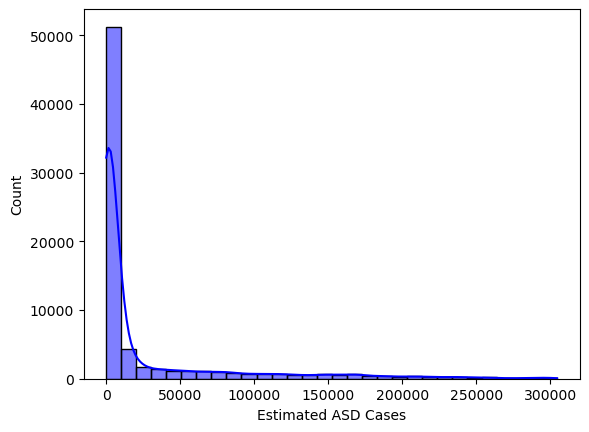

In [30]:
column_to_check = "Estimated ASD Cases" 
print(df_filtered .select_dtypes(include=["number"]).columns)
sns.histplot(df_filtered [column_to_check], bins=30, kde=True, color="blue")
plt.show()

Index(['Total Population', 'Population', 'ASD Rate', 'Estimated ASD Cases',
       'Log_ASD_Cases'],
      dtype='object')


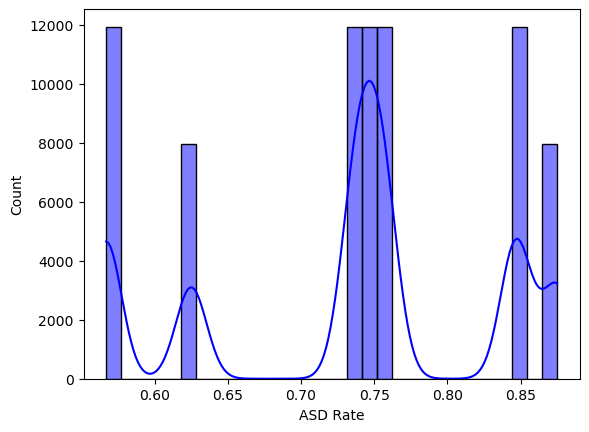

In [31]:
# Extreme value check
column_to_check = "ASD Rate"
print(df.select_dtypes(include=["number"]).columns)
sns.histplot(df[column_to_check], bins=30, kde=True, color="blue")
plt.show()

### no major outliers

Index(['Total Population', 'Population', 'ASD Rate', 'Estimated ASD Cases',
       'Log_ASD_Cases'],
      dtype='object')


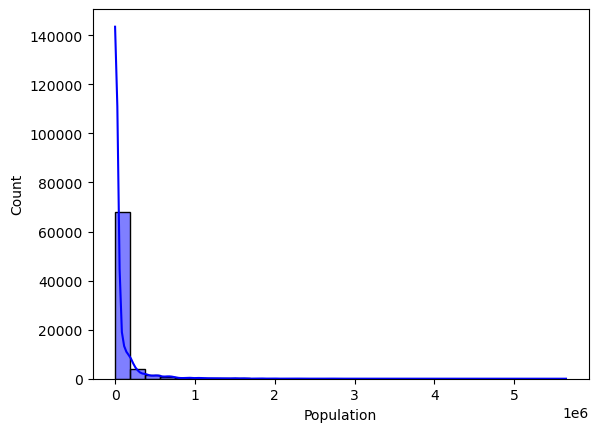

In [32]:
# Extreme value check
column_to_check = "Population"
print(df.select_dtypes(include=["number"]).columns)
sns.histplot(df[column_to_check], bins=30, kde=True, color="blue")
plt.show()

In [33]:
df["Log_Population"] = np.log1p(df["Population"])

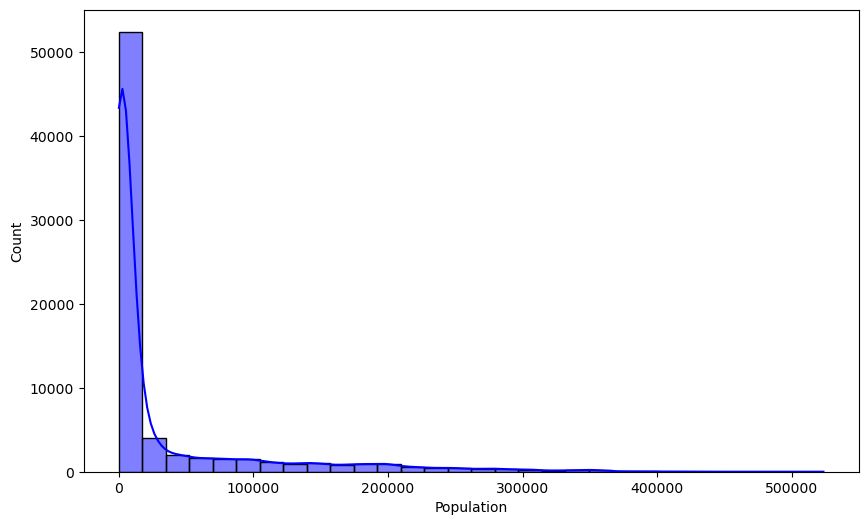

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df_filtered["Population"], bins=30, kde=True, color="blue")
plt.show()

Index(['Total Population', 'Population', 'ASD Rate', 'Estimated ASD Cases',
       'Log_ASD_Cases', 'Log_Population'],
      dtype='object')


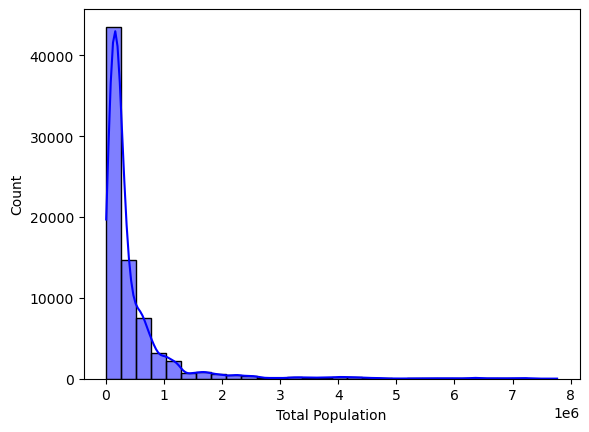

In [35]:
# Extreme value check
column_to_check = "Total Population"
print(df.select_dtypes(include=["number"]).columns)
sns.histplot(df[column_to_check], bins=30, kde=True, color="blue")
plt.show()

In [36]:
print(df_filtered.describe())

       Total Population     Population      ASD Rate  Estimated ASD Cases  \
count      7.183500e+04   71835.000000  71835.000000         71835.000000   
mean       3.937636e+05   33507.597244      0.729861         26473.720228   
std        6.144618e+05   67381.632520      0.098980         54639.073911   
min        6.337000e+03       0.000000      0.566942             0.000000   
25%        1.176280e+05     774.000000      0.625000           536.890218   
50%        2.161580e+05    3303.000000      0.746712          2275.979417   
75%        4.074000e+05   21480.500000      0.757576         15143.105785   
max        7.765907e+06  523552.000000      0.875000        304685.109290   

       Log_ASD_Cases  
count   71835.000000  
mean        7.957174  
std         2.369786  
min         0.000000  
25%         6.287654  
50%         7.730605  
75%         9.625367  
max        12.627037  


In [37]:
print(df_filtered.isnull().sum())

State                  0
Total Population       0
Ethnicity              0
Population             0
ASD Rate               0
Estimated ASD Cases    0
Log_ASD_Cases          0
dtype: int64


In [38]:
stricter_cutoff = np.percentile(df_filtered["Total Population"], 98)
df_final = df_filtered[df_filtered["Total Population"] <= stricter_cutoff].copy()
print(f"Stricter High Cutoff (98th Percentile): {stricter_cutoff}")

Stricter High Cutoff (98th Percentile): 2237558.039999989


In [39]:
print(df_final["Total Population"].max())

2237087


In [40]:
print(f"Rows before filtering: {len(df_filtered)}")
print(f"Rows after filtering: {len(df_final)}")

Rows before filtering: 71835
Rows after filtering: 70398


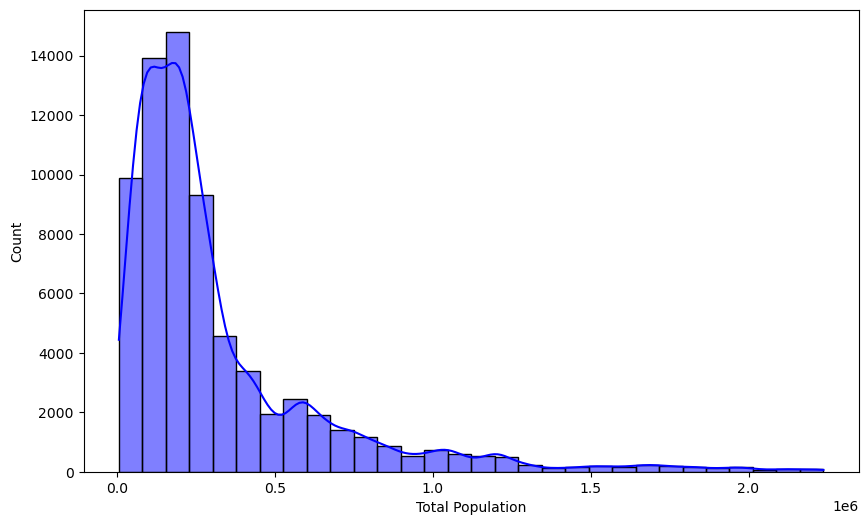

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df_final["Total Population"], bins=30, kde=True, color="blue")
plt.show()

In [42]:
df_selected = df_filtered[["State", "ASD Rate"]]

In [43]:
df_selected.to_csv("ASD_Rates_by_State.csv", index=False)

### Choropleth Map

In [44]:
data_to_plot = df_selected.copy()  # Make sure your DataFrame contains all states

In [45]:
print(data_to_plot.columns)

Index(['State', 'ASD Rate'], dtype='object')


In [46]:
data_to_plot.rename(columns={"State": "STATE_NAME", "ASD Rate": "rating"}, inplace=True)

In [47]:
data_to_plot = data_to_plot.groupby("STATE_NAME", as_index=False)["rating"].mean()

In [48]:
from folium.features import GeoJsonTooltip

map = folium.Map(location=[40, -95], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data=country_geo,  
    data=data_to_plot,
    columns=["STATE_NAME", "rating"],
    key_on="feature.properties.name",
    fill_color="Spectral", 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name="ASD Rate by State",
  bins = [0.55, 0.60, 0.65, 0.70, 0.74, 0.76, 0.78, 0.80, 0.82, 0.85, 0.88]
).add_to(map)

# Add interactive tooltips
folium.GeoJson(
    country_geo,
    style_function=lambda x: {"fillColor": "transparent", "color": "black", "weight": 0.5},
    tooltip=GeoJsonTooltip(
        fields=["name"],  # Displays state name
        aliases=["State: "],
        localize=True,
        sticky=True,
        labels=True
    )
).add_to(map)

folium.LayerControl().add_to(map)

# Save and display the updated map
map.save("ASD_Rate_Map_Tooltip.html")
map

### Fixing The Issue:

I fixed the problem by getting help from AI.

In [49]:
data_to_plot = data_to_plot.groupby("STATE_NAME", as_index=False)["rating"].mean()

In [50]:
print(data_to_plot.groupby("STATE_NAME").size())

STATE_NAME
Alabama           1
Alaska            1
Arizona           1
Arkansas          1
California        1
Colorado          1
Connecticut       1
Florida           1
Georgia           1
Idaho             1
Illinois          1
Indiana           1
Iowa              1
Kansas            1
Kentucky          1
Louisiana         1
Maine             1
Maryland          1
Massachusetts     1
Michigan          1
Minnesota         1
Mississippi       1
Missouri          1
Montana           1
Nebraska          1
Nevada            1
New Hampshire     1
New Jersey        1
New Mexico        1
New York          1
North Carolina    1
North Dakota      1
Ohio              1
Oklahoma          1
Oregon            1
Pennsylvania      1
South Carolina    1
South Dakota      1
Tennessee         1
Texas             1
Utah              1
Vermont           1
Virginia          1
Washington        1
West Virginia     1
Wisconsin         1
dtype: int64


In [51]:
print(data_to_plot["rating"].describe())

count    46.000000
mean      0.729480
std       0.005667
min       0.713827
25%       0.727785
50%       0.730670
75%       0.734641
max       0.735000
Name: rating, dtype: float64


In [52]:
data_to_plot["normalized_rating"] = (data_to_plot["rating"] - data_to_plot["rating"].min()) / (data_to_plot["rating"].max() - data_to_plot["rating"].min())

In [53]:
from folium.features import GeoJsonTooltip

map = folium.Map(location=[40, -95], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data=country_geo,  
    data=data_to_plot,
    columns=["STATE_NAME", "rating"],
    key_on="feature.properties.name",
    fill_color="Spectral", 
    fill_opacity=0.6, 
    line_opacity=0.1,
    legend_name="ASD Rate by State",
 bins = [0.71, 0.72, 0.725, 0.73, 0.735, 0.74, 0.75]
).add_to(map)

# Add interactive tooltips
folium.GeoJson(
    country_geo,
    style_function=lambda x: {"fillColor": "transparent", "color": "black", "weight": 0.5},
    tooltip=GeoJsonTooltip(
        fields=["name"],  # Displays state name
        aliases=["State: "],
        localize=True,
        sticky=True,
        labels=True
    )
).add_to(map)

folium.LayerControl().add_to(map)

# Save and display the updated map
map.save("ASD_Rate_Map_Tooltip.html")
map

### Observation:
** States with the Highest ASD Rates:
The states with the highest rates (close to 0.735) include:
- Michigan
- Minnesota
- New York
- Pennsylvania
- Wisconsin
These states might have better screening, diagnostic resources, or higher awareness, contributing to higher reported ASD rates.

** States with the Lowest ASD Rates:
The states with the lowest rates (closer to 0.713) include:
- Alabama
- Arkansas
- Mississippi
- South Dakota
- West Virginia
These states could have less access to early diagnosis, lower awareness, or different reporting standards, leading to lower ASD rate visibility.


 ## Discussion of Results & Insights:
### Key Findings from the ASD Rate Analysis
The analysis reveals that ASD rates across U.S. states are closely clustered between 0.713 and 0.735, with minimal variation. However, a few states stand out:
- Highest ASD Rates: Michigan, Minnesota, New York, Pennsylvania, Wisconsin (~0.735)
- Possible reasons include better screening programs, increased awareness, and higher diagnostic rates.
- Lowest ASD Rates: Alabama, Arkansas, Mississippi, South Dakota, West Virginia (~0.713)
- This could be linked to limited healthcare access, lower awareness, or differing diagnostic criteria.

** Overall, while ASD rates vary slightly, most states fall within a narrow range,suggesting either:
*  A consistent national trend in ASD prevalence,
* Possible gaps in regional reporting that affect visibility.

*** Does This Answer Existing Research Questions?
- If the goal was to identify regional differences, the answer is mixed:
- Some states show slightly higher or lower rates, but not drastic variations.
- The narrow spread suggests that external factors (diagnostics, reporting methods, awareness) may play a bigger role than geographic location.
- If the goal was to explore how ASD rates change across populations, further analysis may be needed:
- The dataset doesn’t yet account for socioeconomic factors, which could explain differences between states.

*** New Research Questions Emerging From These Results
1) Why do some states report higher ASD rates?
- Is it due to better healthcare access or actual differences in prevalence?
2) How do socio-economic factors impact ASD diagnosis rates?
- Are lower-income states underreporting ASD cases?
3) Does early childhood intervention affect regional ASD statistics?
- States with robust screening programs may show higher rates due to better diagnosis.


In [54]:
map.save(os.path.join(path, "04 Analysis", "Visualization", "ASD_Rate_Map.html"))